In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Black/White

## Refseq OTU

In [2]:
task = 'Ravel Black/White Refseq OTU'
folder = 'ravel-black-white'

In [3]:
num_features = 588
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/MCDLI6_ravel_20210215_19_59_09/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/FXVOAM_ravel_20210215_19_59_11/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/H4CPX2_ravel_20210215_20_02_38/best_test.csv', sep=';') # NoRel+CLR

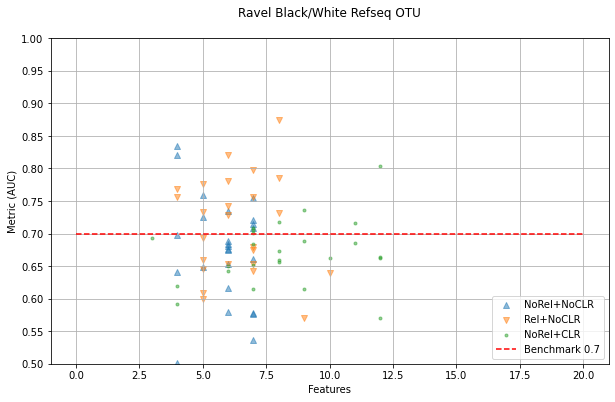

In [17]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.70, filename='./plots/ravel_black_white_refseq_otu.png', xmax=20, ylim=(0.5, 1.001))

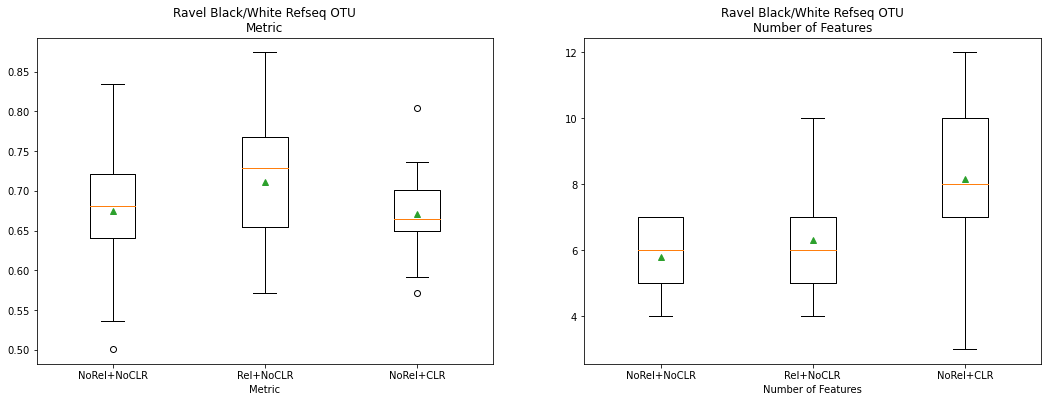

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plots/ravel_black_white_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 588)


In [11]:
# Experiment 2

config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 588)


In [12]:
# Experiment 3

config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 588)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
30,14,7,0.576,0.564,"[60, 157, 211, 227, 311, 366, 490]",0.564,0.564,"[0.774, 0.715, 0.833, 0.638, 0.624, 0.769, 0.7...",0.750,0.549,0.908,0.067
27,12,5,0.759,0.751,"[60, 157, 311, 331, 457]",0.750,0.750,"[0.654, 0.746, 0.703, 0.793, 0.734, 0.82, 0.79...",0.747,0.553,0.895,0.066
33,16,7,0.715,0.703,"[60, 157, 311, 334, 364, 457, 511]",0.703,0.703,"[0.714, 0.714, 0.712, 0.711, 0.819, 0.692, 0.8...",0.745,0.544,0.915,0.073
38,19,6,0.675,0.665,"[17, 60, 157, 227, 311, 426]",0.665,0.665,"[0.722, 0.848, 0.776, 0.752, 0.678, 0.59, 0.58...",0.742,0.572,0.911,0.071
31,15,7,0.661,0.649,"[60, 156, 157, 211, 311, 426, 490]",0.649,0.649,"[0.747, 0.868, 0.604, 0.573, 0.737, 0.782, 0.6...",0.741,0.552,0.914,0.072


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
15,8,8,0.874,0.860,"[59, 60, 84, 119, 157, 311, 407, 490]",0.860,0.860,"[0.815, 0.699, 0.799, 0.807, 0.853, 0.812, 0.8...",0.786,0.646,0.928,0.064
44,20,7,0.797,0.785,"[60, 84, 119, 157, 311, 490, 571]",0.785,0.785,"[0.699, 0.888, 0.744, 0.879, 0.79, 0.805, 0.75...",0.773,0.551,0.925,0.066
50,24,7,0.756,0.744,"[18, 60, 84, 157, 311, 379, 490]",0.744,0.744,"[0.781, 0.751, 0.722, 0.731, 0.803, 0.827, 0.7...",0.760,0.483,0.915,0.071
9,4,6,0.654,0.644,"[84, 157, 168, 311, 366, 490]",0.644,0.644,"[0.772, 0.675, 0.786, 0.721, 0.765, 0.711, 0.8...",0.749,0.570,0.895,0.065
12,7,8,0.786,0.772,"[60, 157, 160, 236, 311, 391, 457, 534]",0.772,0.772,"[0.694, 0.784, 0.865, 0.76, 0.754, 0.775, 0.80...",0.748,0.586,0.872,0.065


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
35,20,7,0.684,0.672,"[17, 60, 157, 168, 205, 391, 571]",0.672,0.672,"[0.782, 0.605, 0.81, 0.634, 0.95, 0.759, 0.826...",0.741,0.566,0.950,0.074
41,23,9,0.736,0.721,"[2, 13, 60, 132, 137, 157, 311, 459, 528]",0.721,0.721,"[0.62, 0.815, 0.788, 0.783, 0.766, 0.734, 0.57...",0.738,0.571,0.885,0.068
27,13,9,0.688,0.673,"[10, 60, 133, 157, 311, 331, 391, 470, 512]",0.673,0.673,"[0.722, 0.719, 0.738, 0.649, 0.71, 0.742, 0.67...",0.735,0.586,0.892,0.067
14,8,10,0.663,0.646,"[19, 60, 211, 226, 227, 278, 311, 377, 407, 470]",0.646,0.646,"[0.64, 0.704, 0.739, 0.785, 0.786, 0.786, 0.75...",0.715,0.525,0.895,0.068
8,3,12,0.804,0.784,"[4, 60, 138, 157, 162, 196, 243, 367, 386, 391...",0.784,0.784,"[0.703, 0.802, 0.581, 0.706, 0.66, 0.781, 0.65...",0.703,0.538,0.869,0.071


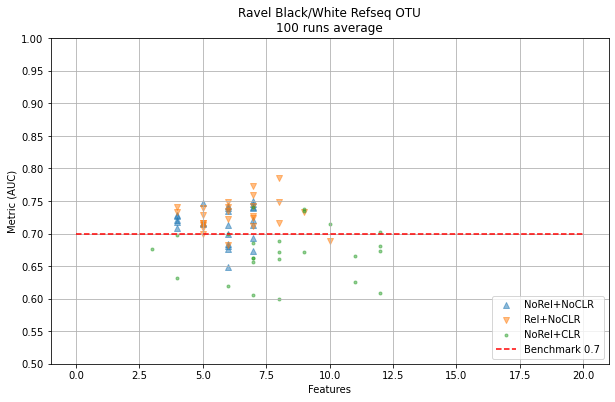

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.70, filename='./plots/ravel_black_white_refseq_otu_avg_n.png', xmax=20, ylim=(0.5, 1.001))

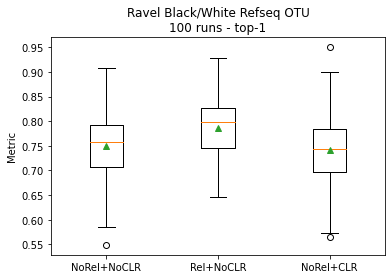

In [18]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plots/ravel_black_white_boxplot_nruns_top1_refseq_otu.png')

---

In [5]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [6]:
folder = 'ravel-black-white'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [7]:
config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    res = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    res = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    res = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(res), 3))

Final dataset shape: (200, 588)
Final dataset shape: (200, 588)
Final dataset shape: (200, 588)


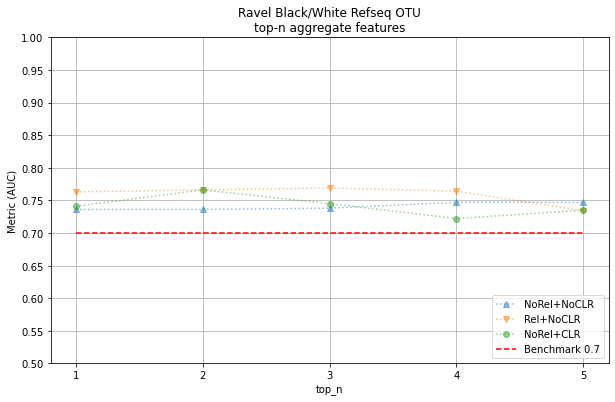

In [8]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.70, filename='./plots/ravel_black_white_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.5, 1.0001), top_n=top_n)

In [9]:
best_n

{'NoRel+NoCLR': [0.736, 0.736, 0.738, 0.747, 0.747],
 'Rel+NoCLR': [0.763, 0.766, 0.769, 0.764, 0.734],
 'NoRel+CLR': [0.741, 0.766, 0.745, 0.722, 0.735]}

---

In [10]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [17]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
_ = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0114       NR_118377.1_Gardnerella_vaginalis_strain_ATCC_14018_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0197       NR_113093.1_Prevotella_amnii_strain_JCM_14753_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0527       NR_113103.1_Prevotella_disiens_strain_JCM_6334_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0573       NR_113098.1_Prevotella_buccalis_strain_JCM_12246_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0613       NR_119137.1_Corynebacterium_jeikeium_strain_CIP_103337_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0625       NR_117757.1_Atopobium_vaginae_strain_DSM_15829_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0672       NR_113638.1_Lactobacillus_acidophilus_strain_NBRC_13951_16S_ribosomal_RNA_gene__partial_sequence
          -            0.073        NR_115728.1_Streptococcus_a

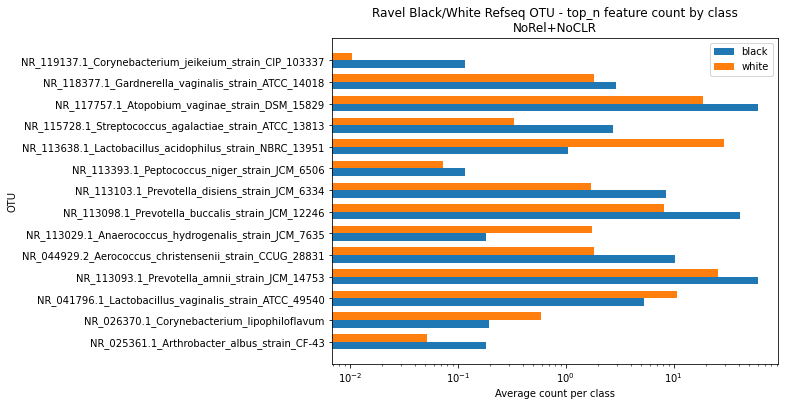

In [18]:
features = data1.features[top_n_features]
filename = f'./plots/ravel_white_black_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,6), filename=filename, clean_otu=True)

In [19]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0361       NR_026375.1_Corynebacterium_sundsvallense_strain_CCUG_36622_16S_ribosomal_RNA_gene__partial_sequence
          -            0.064        NR_115509.1_Peptoniphilus_indolicus_strain_GIFU_7848_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0886       NR_113029.1_Anaerococcus_hydrogenalis_strain_JCM_7635_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1082       NR_036904.1_Staphylococcus_epidermidis_strain_Fussel_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1189       NR_027532.1_Ureaplasma_parvum_serovar_3_strain_ATCC_27815_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1268       NR_117072.1_Lactobacillus_jensenii_strain_Gasser_62G_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1362       NR_026370.1_Corynebacterium_lipophiloflavum_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1422       NR_04

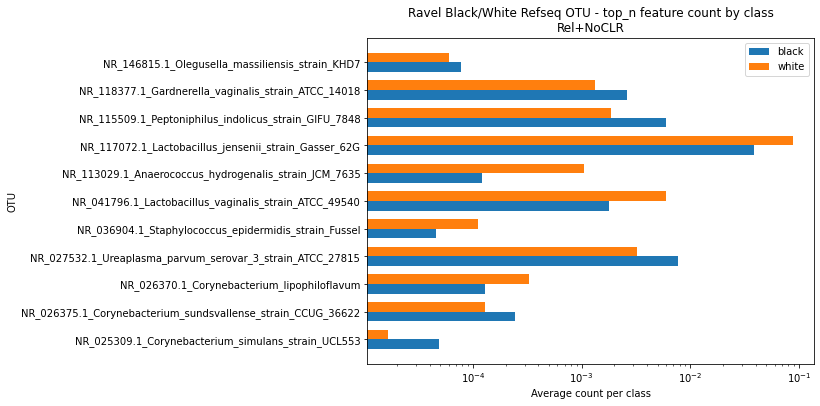

In [20]:
features = data2.features[top_n_features]
filename = f'./plots/ravel_white_black_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,6), filename=filename, clean_otu=True)

In [21]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.096        NR_114315.1_Blautia_luti_strain_DSM_14534_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1288       NR_026213.1_Corynebacterium_xerosis_strain_ATCC_373_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1332       NR_117556.1_Peptoniphilus_coxii_strain_RMA_16757_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1391       NR_113029.1_Anaerococcus_hydrogenalis_strain_JCM_7635_16S_ribosomal_RNA_gene__partial_sequence
          -            0.155        NR_041796.1_Lactobacillus_vaginalis_strain_ATCC_49540_16S_ribosomal_RNA_gene__partial_sequence
          -            0.166        NR_041938.1_Peptoniphilus_lacrimalis_strain_CCUG_31350_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1819       NR_026370.1_Corynebacterium_lipophiloflavum_16S_ribosomal_RNA_gene__partial_sequence



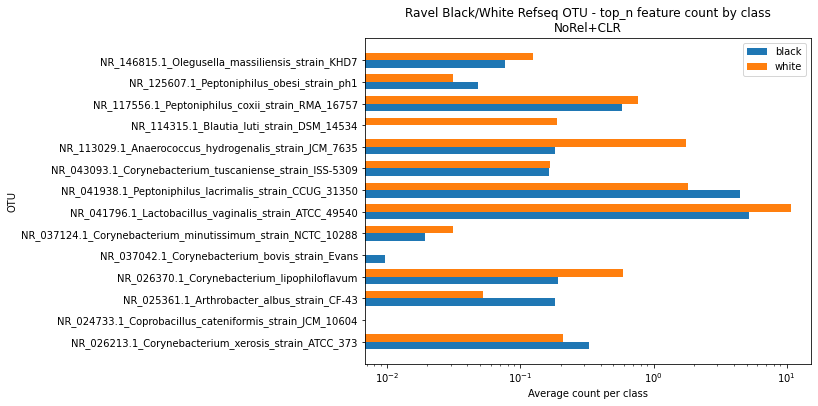

In [22]:
features = data3.features[top_n_features]
filename = f'./plots/ravel_white_black_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,6), filename=filename, clean_otu=True)